### Treść zadania

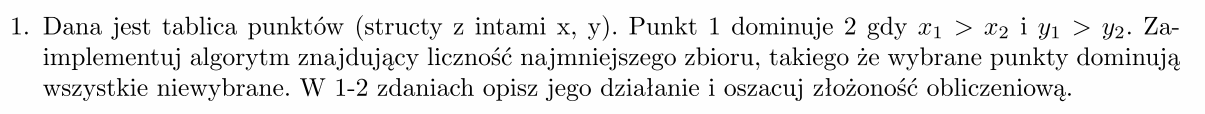

### Omówienie algorytmu

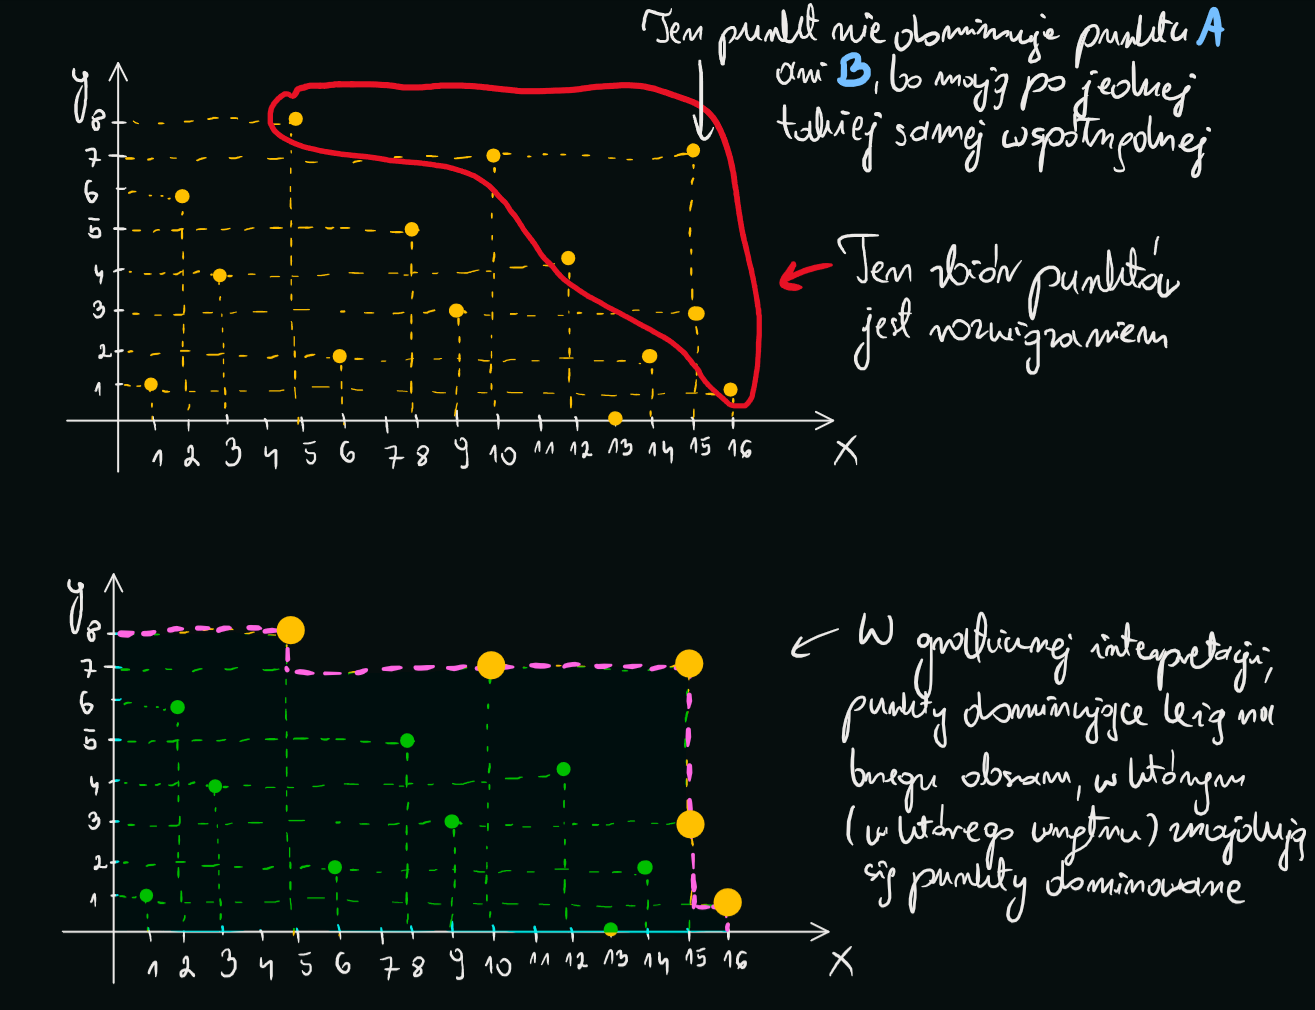
###### UWAGA
Punkty mogą też leżeć w innych ćwiartkach układu współrzędnych. Nie jest to jednak problem, ponieważ obszar dominowania jest nieskończonym obszarem, który ciągnie się w lewo i w dół od granicy wyznaczonej przez zbiór punktów dominujących.

### Złożoność

###### Obliczeniowa:
$ O(n \cdot log(n)) $ - bo sortujemy punkty po współrzędnych, a nie możemy przesortować w czasie liniowym, bo ani nie znamy rozkładu liczb, ani nie mamy ograniczenia wartości.
###### Pamięciowa:
$ O(n) $

### Implementacja

##### Pomocnicze:

In [1]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return f"{self.__class__.__name__}({self.x}, {self.y})"

###### Kod:

In [2]:
def quick_sort(arr, *, fn=lambda x: x):
    _quick_sort(arr, 0, len(arr) - 1, fn)
    

def _quick_sort(arr, left_idx, right_idx, fn):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx, fn)

        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position - 1, fn)
            left_idx = pivot_position + 1
        else:
            _quick_sort(arr, pivot_position + 1, right_idx, fn)
            right_idx = pivot_position - 1
        
        
def _partition(arr, left_idx, right_idx, fn):
    pivot = fn(arr[right_idx])
    
    # Partition an array into 2 subarrays of elements lower than
    # pivot and of elements greater than a pivot
    i = left_idx
    for j in range(left_idx, right_idx):
        if fn(arr[j]) < pivot:
            _swap(arr, i, j)
            i += 1
    
    # Place a pivot element on its destination index
    _swap(arr, i, right_idx)
    
    return i  # Return a pivot position after the last swap

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]


def dominate_helper(P, fn1, fn2):
    n = len(P)
    # Sort points by the specified coordinate coordinate
    quick_sort(P, fn=fn1)
    # Create an array of tuples sorted by the second coordinate
    # of points which will store also an index to the P array
    A = [(fn2(P[i]), i) for i in range(n)]
    quick_sort(A, fn=lambda p: p[0])
    # Create an array of numbers which will indicate on which
    # positions should be points from the P array stored when
    # sorted by the second coordinate specified. If there are
    # points with the same first coordinate, we will store the
    # same number for them
    order = [-1] * n
    k = 0
    order[A[0][1]] = k
    for i in range(1, n):
        if A[i][0] != A[i - 1][0]:
            k += 1
        order[A[i][1]] = k
    # Create a set of points which dominate all the remaining
    # points by the first coordinate specified and aren't dominated
    # by any of rejected points
    start = 0
    B = []
    for i in range(n - 1, -1, -1):
        if order[i] >= start:
            B.append(P[i])
            start = order[i]
    return B
    
    
def union(A, B):
    C = []
    # Sort points in both arrays by their both coordinates
    # in the same order
    quick_sort(A, fn=lambda p: (p.x, p.y))
    quick_sort(B, fn=lambda p: (p.x, p.y))
    # Merge A and B arrays into one array which will contain
    # all elements from A and B array (every item only once)
    i = j = 0
    while i < len(A) and j < len(B):
        if A[i].x < B[j].x or (A[i].x == B[j].x and A[i].y < B[j].y):
            C.append(A[i])
            i += 1
        elif A[i].x > B[j].x or (A[i].x == B[j].x and A[i].y > B[j].y):
            C.append(B[j])
            j += 1
        else:  # If points have both coordinates the same
            C.append(A[i])
            i += 1
            j += 1
    # Append all the remaining points from an array which wasn't
    # exhausted
    for i in range(i, len(A)):
        C.append(A[i])
    for j in range(j, len(B)):
        C.append(B[j])
    return C


def dominate(P: [Point]) -> [Point]:
    # Get an array of points which dominate all other points by x coordinate
    A = dominate_helper(P, lambda p: p.x, lambda p: p.y)
    # Get an array of points which dominate all other points by y coordinate
    B = dominate_helper(P, lambda p: p.y, lambda p: p.x)
    # Return an union of both arrays of points
    return union(A, B)

###### Kilka testów

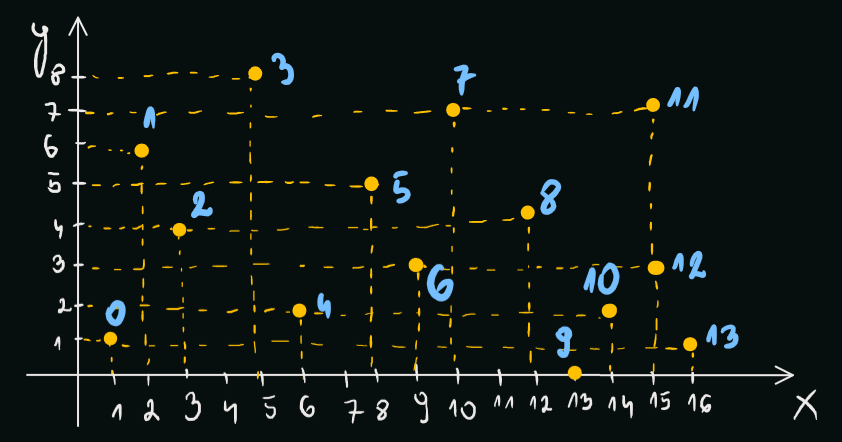

In [3]:
from random import shuffle
P = [Point(x, y) for x, y in ((1, 1), (2, 6), (3, 4), (5, 8), (6, 2), (8, 5), (9, 3), (10, 7), 
                              (12, 4), (13, 0), (14, 2), (15, 7), (15, 3), (16, 1))]

In [4]:
shuffle(P)
print('Input:', P, sep='\n')
print()
print(dominate(P))

Input:
[Point(5, 8), Point(13, 0), Point(15, 7), Point(6, 2), Point(1, 1), Point(2, 6), Point(15, 3), Point(14, 2), Point(10, 7), Point(12, 4), Point(16, 1), Point(3, 4), Point(8, 5), Point(9, 3)]

[Point(5, 8), Point(10, 7), Point(15, 3), Point(15, 7), Point(16, 1)]
